In [2]:
!pip install gurobipy


[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import gurobipy as gp
print("Gurobi version:", gp.gurobi.version())


Gurobi version: (12, 0, 0)


In [4]:
pip install pyomo gurobipy


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import pyomo.environ as pyo
import gurobipy as gp

In [6]:
import pandas as pd

In [7]:
df=pd.read_csv(r"C:\Users\aggar\Downloads\Closing_Prices_5yrs (2).csv")

In [8]:
df.head()

Date  ASIANPAINT.csv  AXISBANK.csv  BAJAJFINSV.csv  BAJFINANCE.csv  \
0  01-02-2019     1456.949951    716.400024      610.034973     2627.550049   
1  04-02-2019     1448.400024    719.200012      600.979980     2594.050049   
2  05-02-2019     1450.449951    727.799988      600.989990     2602.149902   
3  06-02-2019     1465.849976    723.900024      620.594971     2707.649902   
4  07-02-2019     1472.050049    729.349976      623.895020     2697.699951   

   BHARTIARTL.csv  HCLTECH.csv  HDFCBANK.csv  HINDUNILVR.csv  ICICIBANK.csv  \
0      311.299988   522.000000   1045.824951     1796.250000     354.500000   
1      306.600006   519.674988   1053.500000     1803.150024     354.600006   
2      307.850006   522.700012   1057.449951     1821.199951     352.350006   
3      308.299988   526.900024   1061.500000     1828.550049     358.899994   
4      310.950012   530.525024   1058.525024     1836.900024     358.750000   

   ...  RELIANCE.csv    SBIN.csv  SUNPHARMA.csv  TATAMOTORS.csv  \
0  ...   1247.300049  284.299988     423.250000      181.750000   
1  ...   1291.150024  283.600006     414.350006      180.300003   
2  ...   1290.300049  284.500000     409.299988      175.550003   
3  ...   1309.849976  288.200012     415.399994      178.199997   
4  ...   1290.199951  287.600006     434.000000      182.899994   

   TATASTEEL.csv      TCS.csv   TECHM.csv    TITAN.csv  ULTRACEMCO.csv  \
0      47.340000  2030.750000  747.849976   991.299988     3478.000000   
1      47.580002  2047.150024  749.400024  1025.699951     3454.399902   
2      46.474998  2044.349976  750.000000  1066.650024     3460.100098   
3      48.439999  2077.850098  811.000000  1059.099976     3506.500000   
4      48.759998  2079.899902  804.349976  1057.699951     3572.199951   

    WIPRO.csv  
0  278.512512  
1  278.325012  
2  276.412506  
3  279.037506  
4  280.237488  

[5 rows x 31 columns]

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
#part-1

df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df_filled = df.fillna(df.mean())


# Return = (Price on Day T+1 - Price on Day T) / Price on Day T

rate_of_returns = pd.DataFrame()

for column in df_filled.columns[1:]: 
    returns = []
    for i in range(len(df_filled) - 5): 
        price_today = df_filled[column].iloc[i]
        price_5_days_later = df_filled[column].iloc[i + 5]
        rate_of_return = (price_5_days_later - price_today) / price_today
        returns.append(rate_of_return)
    
   
    rate_of_returns[column] = returns

average_returns = rate_of_returns.mean()

average_returns

ASIANPAINT.csv    0.004567
AXISBANK.csv      0.004155
BAJAJFINSV.csv    0.006121
BAJFINANCE.csv    0.007046
BHARTIARTL.csv    0.007628
HCLTECH.csv       0.006416
HDFCBANK.csv      0.002402
HINDUNILVR.csv    0.001872
ICICIBANK.csv     0.007338
INDUSINDBK.csv    0.004424
INFY.csv          0.004772
ITC.csv           0.005120
JSWSTEEL.csv      0.009157
KOTAKBANK.csv     0.002399
LT.csv            0.007500
M&M.csv           0.007578
MARUTI.csv        0.002922
NESTLEIND.csv     0.003779
NTPC.csv          0.007098
POWERGRID.csv     0.004763
RELIANCE.csv      0.004596
SBIN.csv          0.006764
SUNPHARMA.csv     0.007648
TATAMOTORS.csv    0.015253
TATASTEEL.csv     0.006658
TCS.csv           0.003546
TECHM.csv         0.004075
TITAN.csv         0.009067
ULTRACEMCO.csv    0.006484
WIPRO.csv         0.003796
dtype: float64

In [11]:
#part-2

std_dev = rate_of_returns.std()

# Display the standard deviations
print(std_dev)

ASIANPAINT.csv    0.058701
AXISBANK.csv      0.073024
BAJAJFINSV.csv    0.065466
BAJFINANCE.csv    0.082328
BHARTIARTL.csv    0.069530
HCLTECH.csv       0.064301
HDFCBANK.csv      0.047216
HINDUNILVR.csv    0.036353
ICICIBANK.csv     0.081504
INDUSINDBK.csv    0.095222
INFY.csv          0.057831
ITC.csv           0.083347
JSWSTEEL.csv      0.107898
KOTAKBANK.csv     0.044375
LT.csv            0.087969
M&M.csv           0.095327
MARUTI.csv        0.055681
NESTLEIND.csv     0.036524
NTPC.csv          0.083055
POWERGRID.csv     0.050928
RELIANCE.csv      0.054178
SBIN.csv          0.090466
SUNPHARMA.csv     0.078910
TATAMOTORS.csv    0.155558
TATASTEEL.csv     0.070640
TCS.csv           0.045823
TECHM.csv         0.062436
TITAN.csv         0.092283
ULTRACEMCO.csv    0.067509
WIPRO.csv         0.059401
dtype: float64


In [12]:
#part-3

cov_matrix = np.cov(rate_of_returns.T)

# extracting the diagonal of the covariance matrix and take square root to get the standard deviations
std_dev_from_cov = np.sqrt(np.diagonal(cov_matrix))

comparison_df = pd.DataFrame({
    'Standard Deviation (Computed)': std_dev,
    'Standard Deviation from Covariance': std_dev_from_cov
})

# Print the comparison table
print(comparison_df)

                Standard Deviation (Computed)  \
ASIANPAINT.csv                       0.058701   
AXISBANK.csv                         0.073024   
BAJAJFINSV.csv                       0.065466   
BAJFINANCE.csv                       0.082328   
BHARTIARTL.csv                       0.069530   
HCLTECH.csv                          0.064301   
HDFCBANK.csv                         0.047216   
HINDUNILVR.csv                       0.036353   
ICICIBANK.csv                        0.081504   
INDUSINDBK.csv                       0.095222   
INFY.csv                             0.057831   
ITC.csv                              0.083347   
JSWSTEEL.csv                         0.107898   
KOTAKBANK.csv                        0.044375   
LT.csv                               0.087969   
M&M.csv                              0.095327   
MARUTI.csv                           0.055681   
NESTLEIND.csv                        0.036524   
NTPC.csv                             0.083055   
POWERGRID.csv       

YES standard deviation computed in the above step is consistent with the covarinaces.

In [13]:
#part-4

correlation_matrix = rate_of_returns.corr()

correlation_pairs = correlation_matrix.abs().unstack().sort_values(ascending=False)

correlation_pairs = correlation_pairs[correlation_pairs < 1] # Removing self-correlations (correlation of a stock with itself)


correlation_pairs = correlation_pairs[correlation_pairs.index.map(lambda x: x[0] < x[1])] #removing duplicate values 

top_3_pairs = correlation_pairs.head(3) #top 3 pairs with highest correlation

print("\nTop 3 pairs of highly correlated stocks:")
for pair in top_3_pairs.index:
    
    print(f"{pair[0]} and {pair[1]} with correlation: {top_3_pairs[pair]}")


Top 3 pairs of highly correlated stocks:
ICICIBANK.csv and SBIN.csv with correlation: 0.9013369329078628
LT.csv and TITAN.csv with correlation: 0.8843576923032653
AXISBANK.csv and ICICIBANK.csv with correlation: 0.8806551865439697


PART-5,6

ui: This is the expected rate of return for each individual stock. This parameter comes from historical data or some external forecast for each stock's return
(??): This is the total value you expect to achieve in the return constraint, scaling the return constraint.This value depends on the total value we are aiming for.  If we want the total return to meet a certain value ex 0.00025, Then we can define this parameter directly in the model

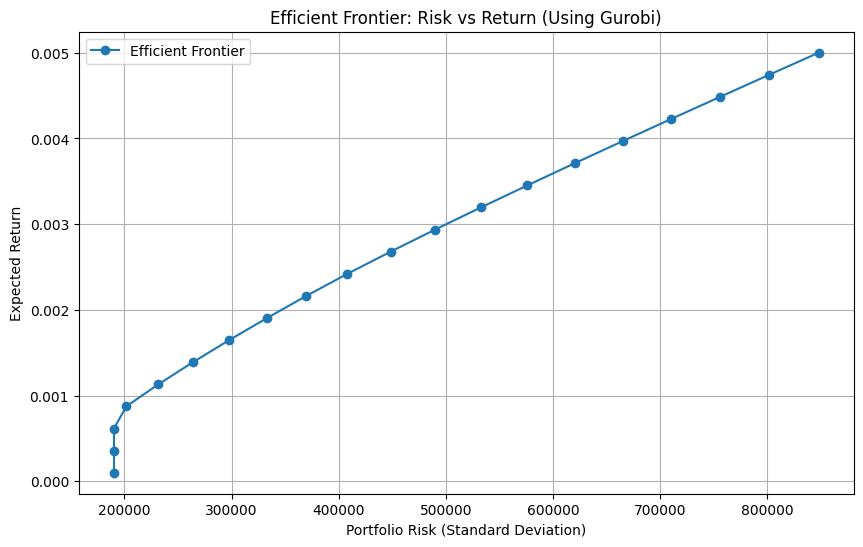

In [14]:
#PART-5,6

from pyomo.environ import *
from pyomo.opt import SolverFactory

df.fillna(df.mean(), inplace=True)  

rate_of_returns = df.iloc[:, 1:].pct_change().dropna()


expected_returns = rate_of_returns.mean().values


cov_matrix = np.cov(rate_of_returns.T)

n = len(expected_returns) #no. of stocks


total_investment = 1e7  #1 cr

target_returns = np.linspace(0.0001, 0.005, 20)  # Testing 20 values from 0.01% to 0.5%


risks = []
returns = []

for target_return in target_returns:
    model = ConcreteModel()
    model.x = Var(range(n), domain=NonNegativeReals)

 
    model.total_constraint = Constraint(expr=sum(model.x[i] for i in range(n)) == total_investment)

    
    model.return_constraint = Constraint(
        expr=sum(expected_returns[i] * model.x[i] for i in range(n)) >= target_return * total_investment
    )

    def risk_function(model):
        return sum(cov_matrix[i, j] * model.x[i] * model.x[j] for i in range(n) for j in range(n))

    model.risk = Objective(rule=risk_function, sense=minimize)

    solver = SolverFactory('gurobi')
    solver.solve(model)

    x_opt = np.array([model.x[i].value for i in range(n)]) #computing risk
    risk = np.dot(x_opt, np.dot(cov_matrix, x_opt))


    risks.append(np.sqrt(risk))  
    returns.append(target_return)

# risk vs. return (Efficient Frontier)
plt.figure(figsize=(10, 6))
plt.plot(risks, returns, marker='o', linestyle='-', label="Efficient Frontier")
plt.xlabel("Portfolio Risk (Standard Deviation)")
plt.ylabel("Expected Return")
plt.title("Efficient Frontier: Risk vs Return (Using Gurobi)")
plt.grid(True)
plt.legend()
plt.show()


This plot is showing that when risk is low, the expected return is also low. As we move towards the right-hand side, where the risk increases, the expected return also increases.

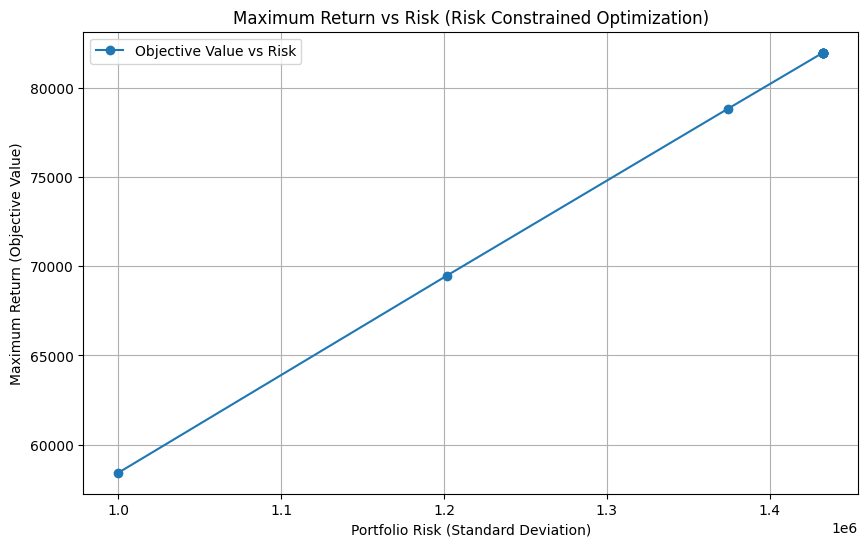

In [32]:
#part-7

df.fillna(df.mean(), inplace=True)

rate_of_returns = df.iloc[:, 1:].pct_change().dropna()


expected_returns = rate_of_returns.mean().values
cov_matrix = np.cov(rate_of_returns.T)

n = len(expected_returns)


total_investment = 1e7  

risk_levels = np.linspace(0.01 * 1e14, 0.05 * 1e14, 10)

objective_values = []  
risks = []

for risk_threshold in risk_levels:
   
    model = ConcreteModel()
    model.x = Var(range(n), domain=NonNegativeReals)
    
    model.total_constraint = Constraint(expr=sum(model.x[i] for i in range(n)) == total_investment)
    
  
    def risk_constraint(model):
        return sum(cov_matrix[i, j] * model.x[i] * model.x[j] for i in range(n) for j in range(n)) <= risk_threshold
    model.risk_constraint = Constraint(rule=risk_constraint)
    
   
    def objective(model):
        return sum(expected_returns[i] * model.x[i] for i in range(n))
    model.obj = Objective(rule=objective, sense=maximize)

   
    solver = SolverFactory('gurobi')
    solver.solve(model)
    
   
    objective_value = model.obj.expr() 
    objective_values.append(objective_value)
    
 
    x_opt = np.array([model.x[i].value for i in range(n)])
    
   
    portfolio_risk = np.dot(x_opt, np.dot(cov_matrix, x_opt)) ** 0.5
    risks.append(portfolio_risk)

plt.figure(figsize=(10, 6))
plt.plot(risks, objective_values, marker='o', linestyle='-', label="Objective Value vs Risk")
plt.xlabel("Portfolio Risk (Standard Deviation)")
plt.ylabel("Maximum Return (Objective Value)")
plt.title("Maximum Return vs Risk (Risk Constrained Optimization)")
plt.grid(True)
plt.legend()
plt.show()


This is sort of linear graph. With increase in risk the maximum return increases linearly.


In [16]:
#part-8

# Parameters
n = 30  # Number of stocks
total_investment = 100000000  # Total investment (1 crore)

expected_returns = rate_of_returns.mean().values

cov_matrix = np.cov(rate_of_returns.T) 
cov_matrix = (cov_matrix + cov_matrix.T) / 2 


equal_investment = total_investment / n # equal investment in all stocks


expected_return_portfolio = np.dot(expected_returns, np.ones(n)) / n # expected return for the equal-weighted portfolio

portfolio_variance = 0
for i in range(n):
    for j in range(n):
        portfolio_variance += (1/n) * (1/n) * cov_matrix[i, j]

portfolio_risk = np.sqrt(portfolio_variance)

print(f"Expected Rate of Return for equal investment: {expected_return_portfolio}")
print(f"Portfolio Risk (Standard Deviation): {portfolio_risk}")


Expected Rate of Return for equal investment: 0.002349772678191384
Portfolio Risk (Standard Deviation): 0.05128569475146737


Basically it is simple and does not require any optimization. Also it diversifies the portfolio across all 30 stocks which reduces the risk.But it might not be optimal in maximizing return for a given level of risk, if some stocks are riskier than others. A optimization strategy could better balance risk and return. SO optimal allocation would depend on the risk-return trade-off, which can be better achieved with optimization models. So i would not recommend this strategy.